# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [7]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [8]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()
#pyber_data_df.columns

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [9]:
#1. Get the total rides for each city type
city_rides_type = pyber_data_df.groupby(["type"])["ride_id"].size()
city_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
#2. Get the total drivers for each city type
city_drivers_type = city_data_df.groupby(["type"])["driver_count"].size()
city_drivers_type

type
Rural       18
Suburban    36
Urban       66
Name: driver_count, dtype: int64

In [11]:
#3. Get the total amount of fares for each city type
city_fares_type = pyber_data_df.groupby(["type"])["fare"].sum()
city_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#4. Get the average fare per ride for each city type. 
city_fares_avg = city_fares_type / city_rides_type
city_fares_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
#5. Get the average fare per driver for each city type. 
avg_fare_driver = city_fares_type / city_drivers_type
avg_fare_driver

type
Rural       240.440556
Suburban    537.675833
Urban       603.854242
dtype: float64

In [14]:
#6. Create a PyBer summary DataFrame.                           
pyber_summary_df = pd.DataFrame(
    {"Total Rides": city_rides_type, 
      "Total Drivers": city_drivers_type, 
      "Total Fares": city_fares_type,
      "Average Fare per Ride": city_fares_avg,
      "Average Fare per Driver": avg_fare_driver})

In [15]:
#7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,18,4327.93,34.623440,240.440556
Suburban,625,36,19356.33,30.970128,537.675833
Urban,1625,66,39854.38,24.525772,603.854242


In [16]:
#8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.0f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.0f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.0f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,18,"$4,328",$35,$240
Suburban,625,36,"$19,356",$31,$538
Urban,"1,625",66,"$39,854",$25,$604


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [17]:
#1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
#2. Using groupby() to create a new DataFrame showing the sum of the fares 
#   for each date where the indices are the city type and date.
daily_fare_totals_df = pyber_data_df.groupby(["date", "type"])["fare"].sum()

In [19]:
#3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
daily_fare_totals_df = daily_fare_totals_df.reset_index()
daily_fare_totals_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [20]:
#4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
#   to get the total fares for each type of city by the date. 
# index, column, values
daily_fare_totals_df = daily_fare_totals_df.pivot(index = "date", columns = "type", values = "fare")
daily_fare_totals_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [21]:
#5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
daily_fare_totals_df = daily_fare_totals_df.loc["2019-01-01":"2019-04-29"]
daily_fare_totals_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [22]:
#6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#df.index = pd.to_datetime(df.index)

daily_fare_totals_df.index = pd.to_datetime(daily_fare_totals_df.index)
daily_fare_totals_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [23]:
#7. Check that the datatype for the index is datetime using df.info()
daily_fare_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [24]:
#8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_totals_df = daily_fare_totals_df.resample("W").sum()
weekly_fare_totals_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


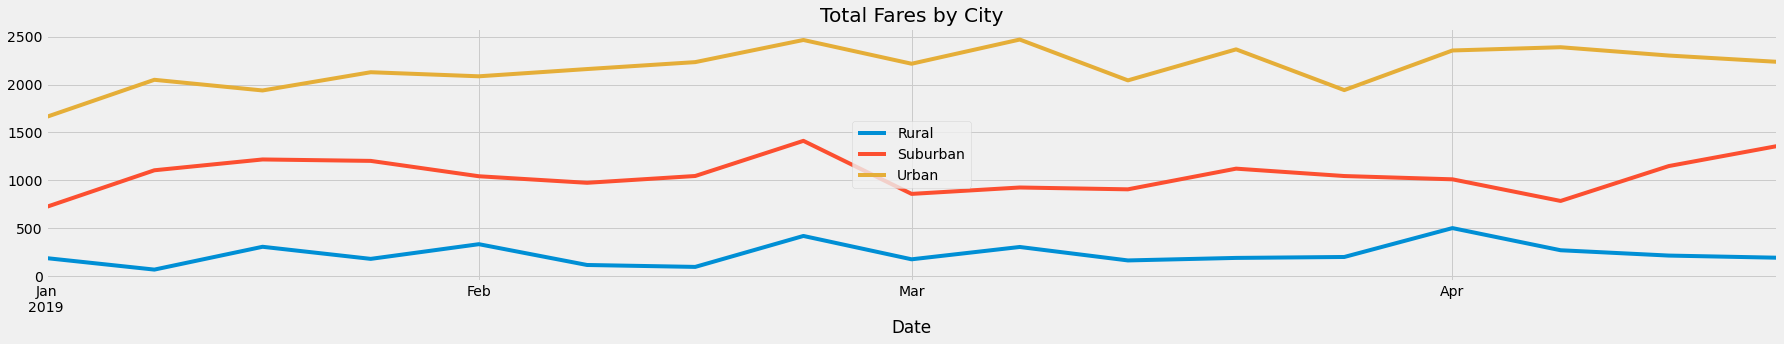

In [25]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Fixing random state for reproducibility
total_fares_by_city = weekly_fare_totals_df.plot(figsize = (25, 5))

plt.title("Total Fares by City")
plt.legend(loc = "center")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("analysis/FigChallenge.png")
plt.show()
